# 이상값 처리

In [1]:
import random
import pandas as pd
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import os
if os.name == 'nt':
    font_family = 'Malgun Gothic'
else:
    font_family = 'Apple Gothic'
sns.set(font=font_family, rc={'axes.unicode_minus':False})

In [2]:
np_data = np.random.randint(1, 100, size=3000)
data=list(np_data)
data[0:2]

[11, 12]

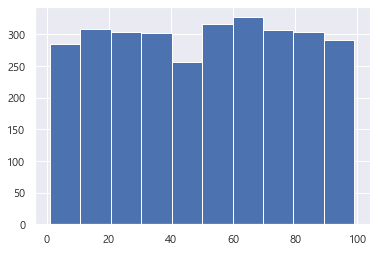

In [3]:
plt.hist(data)
plt.show()

50.272333333333336
28.418893384898404


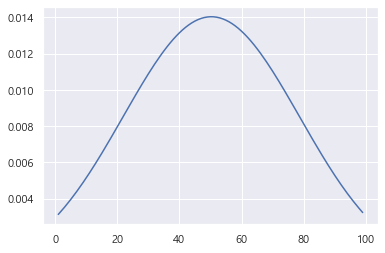

In [4]:
data_mean = np.mean(data)
data_std = np.std(data)

print(data_mean)
print(data_std)

pdf = stats.norm.pdf(np.sort(data), data_mean, data_std)

plt.figure()
plt.plot(np.sort(data), pdf)

-8.940996091647927e-17
1.0


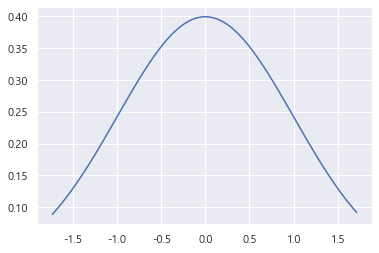

In [5]:
std_list = []

for i in data:
    z = (i - data_mean) / data_std
    std_list.append(z)

ol_data_mean = np.mean(std_list)
ol_data_std = np.std(std_list)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(std_list),
                       ol_data_mean, ol_data_std)
plt.figure()
plt.plot(np.sort(std_list), ol_pdf)

50.424252491694354
28.71163324468749


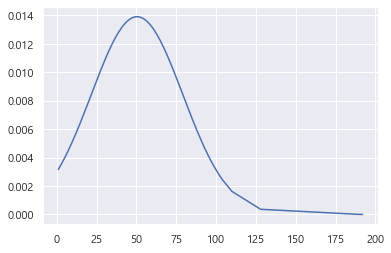

In [6]:
ol_data = data.copy()
ol_no = 10

for i in range(ol_no):
    rand_no = random.randint(0, len(data))
    ol_data.insert(rand_no, ol_data[rand_no]*2)

ol_data_mean = np.mean(ol_data)
ol_data_std = np.std(ol_data)

print(ol_data_mean)
print(ol_data_std)

ol_pdf = stats.norm.pdf(np.sort(ol_data),
                       ol_data_mean, ol_data_std)

plt.figure()
plt.plot(np.sort(ol_data), ol_pdf)

-5.075305255429287e-17
1.0


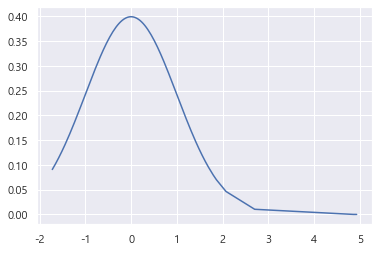

In [7]:
ol_std_list = []

for i in ol_data:
    z = (i-ol_data_mean) / ol_data_std
    ol_std_list.append(z)
    
ol_st_data_mean = np.mean(ol_std_list)
ol_st_data_std = np.std(ol_std_list)

print(ol_st_data_mean)
print(ol_st_data_std)

ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list),
                           ol_st_data_mean, ol_st_data_std)
plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [8]:
len(ol_std_list)

3010

In [9]:
for i in ol_std_list:
    z = i
    if z > 2:
        ol_std_list.remove(z)
    if z < -2:
        ol_std_list.remove(z)
len(ol_std_list)        

3006

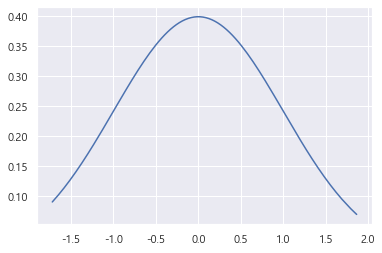

In [10]:
ol_std_pdf = stats.norm.pdf(np.sort(ol_std_list), ol_st_data_mean, ol_st_data_std)

plt.figure()
plt.plot(np.sort(ol_std_list), ol_std_pdf)

In [11]:
boxdata = pd.DataFrame(np.random.randn(100, 3), columns=['A열', 'B열', 'C열'])
boxdata.head()

,A열,B열,C열
0,0.017219,0.279268,0.732367
1,-1.164566,0.704502,0.991457
2,0.625820,0.288899,0.702489
3,-0.183374,-0.513909,-0.616976
4,-0.990599,2.041709,0.482358


In [12]:
boxdata.describe()

,A열,B열,C열
count,100.000000,100.000000,100.000000
mean,0.077726,0.092077,0.050978
std,1.048875,0.950430,0.991968
min,-2.684968,-2.160141,-1.886490
25%,-0.615405,-0.567924,-0.617187
50%,-0.086862,0.152573,-0.031445
75%,0.761683,0.739950,0.698996
max,2.628352,2.634028,3.084434


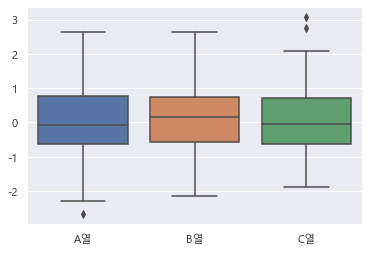

In [13]:
sns.boxplot(data=boxdata)
plt.show()

In [15]:
def get_outlier(df=None, column=None, weight=1.5):
    quantile_25 = np.percentile(df[column].values, 25)
    quantile_75 = np.percentile(df[column].values, 75)
    
    IQR = quantile_75 - quantile_25
    IQR_weight = IQR*weight
    
    lowest = quantile_25 - IQR_weight
    highest = quantile_75 + IQR_weight
    
    outlier_idx = df[column][(df[column]<lowest)|(df[column] > highest)].index
    return outlier_idx

outlier_idx = get_outlier(df=boxdata, column='A열', weight=1.5)
outlier_idx

Int64Index([12], dtype='int64')

In [16]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

(99, 3)

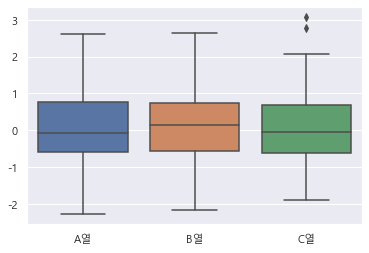

In [17]:
sns.boxplot(data=boxdata)
plt.show()

In [18]:
outlier_idx = get_outlier(df=boxdata, column='C열', weight=1.5)
outlier_idx

Int64Index([39, 77], dtype='int64')

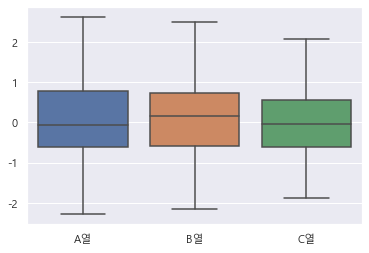

In [19]:
boxdata.drop(outlier_idx, axis=0, inplace=True)
boxdata.shape

sns.boxplot(data=boxdata)
plt.show()

In [20]:
boxdata.shape

(97, 3)